In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

%matplotlib inline

C:\Users\MOHAN KUMAR SAH\.conda\envs\python3.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the data into Pandas dataframe

df = pd.read_csv('spam.csv',encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [4]:
# dropping the last three columns
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

Text(0.5,1,'Number of text belonging to a particular Label')

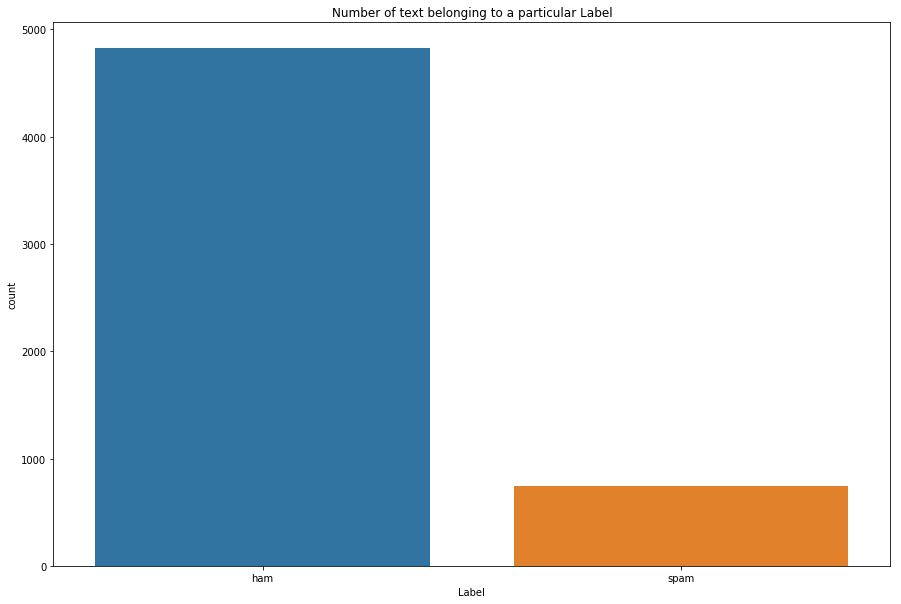

In [6]:
plt.figure(figsize=(15,10))   # for enlarging the size of the figure
sns.countplot(df.v1)  # for plotting a count plot
plt.xlabel('Label')
plt.title('Number of text belonging to a particular Label')

In [7]:
# printing all the unique categories in the dataset

print("Labels\n-------------------------------------------------------------------------------------")
print(df['v1'].unique())

Labels
-------------------------------------------------------------------------------------
['ham' 'spam']


In [8]:
# separating the text and category columns

feature=df.v2
target=df.v1

print("Shape of feature ",feature.shape)
print("Shape of target ",target.shape)

Shape of feature  (5572,)
Shape of target  (5572,)


In [9]:
feature.head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [10]:
target.head(5)

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [11]:
# Process the labels i.e., assigning the numerical value to words

le = LabelEncoder()   # making an object of LabelEncoder() to
target = le.fit_transform(target)   # Fit on the target data
target = target.reshape(-1,1)
target

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [12]:
# Split into training and test data

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457,)
(4457, 1)
(1115,)
(1115, 1)


In [13]:
# Process the data
# Tokenize the data and convert the text to sequences.
# Add padding to ensure that all the sequences have the same shape.

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)   # Create Tokenizer
tok.fit_on_texts(x_train)     # Train the Tokenizer to the texts
sequences = tok.texts_to_sequences(x_train)   # Convert list of strings into list of lists of integers
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ...,  27,  19, 393],
       [  0,   0,   0, ...,  13, 208,  73],
       [  0,   0,   0, ...,  63, 478, 408],
       ...,
       [  0,   0,   0, ...,   0, 232,  18],
       [  0,   0,   0, ..., 310, 405, 164],
       [  0,   0,   0, ...,  76, 280, 257]])

In [14]:
sequences_matrix.shape

(4457, 150)

# Naive Bayes Classifier

Principle:- A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

Bayes theorem:
                P(y/X)=(P(X/y)*P(y)) / P(X)
                
Using Bayes theorem, we can find the probability of y happening, given that X has occurred. Here, X is the evidence and y is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

If X is mutli featured i.e., X=(x1,x2,......xn) then

P(y/(x1,x2,...xn))=(P(x1/y)*P(x2/y)....*P(xn/y)*P(y)) / (P(x1)*P(x2)*..........*P(xn))

Suppose we have more than one label means y takes more than one values in the case we calculate probability corresponding to each label and compare the probability with each others. The label for which probabilty is maximum that label is assigned to the corresponding datapoint

Types of Naive Bayes Classifier:
1. Multinomial Naive Bayes: This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.
2. Bernoulli Naive Bayes: This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.
3. Gaussian Naive Bayes: When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

Here I used Bernoulli Naive Bayes

In [15]:
#Import Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

#Create a Bernoulli Classifier
model = BernoulliNB()

#Train the model using the training sets
model.fit(sequences_matrix, y_train)

C:\Users\MOHAN KUMAR SAH\.conda\envs\python3.5\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [16]:
# Process the test set data

test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
test_sequences_matrix

array([[  0,   0,   0, ..., 135,  12, 304],
       [  0,   0,   0, ..., 104,   8, 332],
       [  0,   0,   0, ..., 114,   2, 835],
       ...,
       [  0,   0,   0, ...,   1,   5, 743],
       [  0,   0,   0, ..., 131,   3,  20],
       [  0,   0,   0, ...,   0,   0,  46]])

In [17]:
test_sequences_matrix.shape

(1115, 150)

In [18]:
#Predict the response for test dataset
y_pred = model.predict(test_sequences_matrix)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [19]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100).round(2),"%")

Accuracy: 75.34 %
